# Task V: Quantum Graph Neural Network (QGNN)

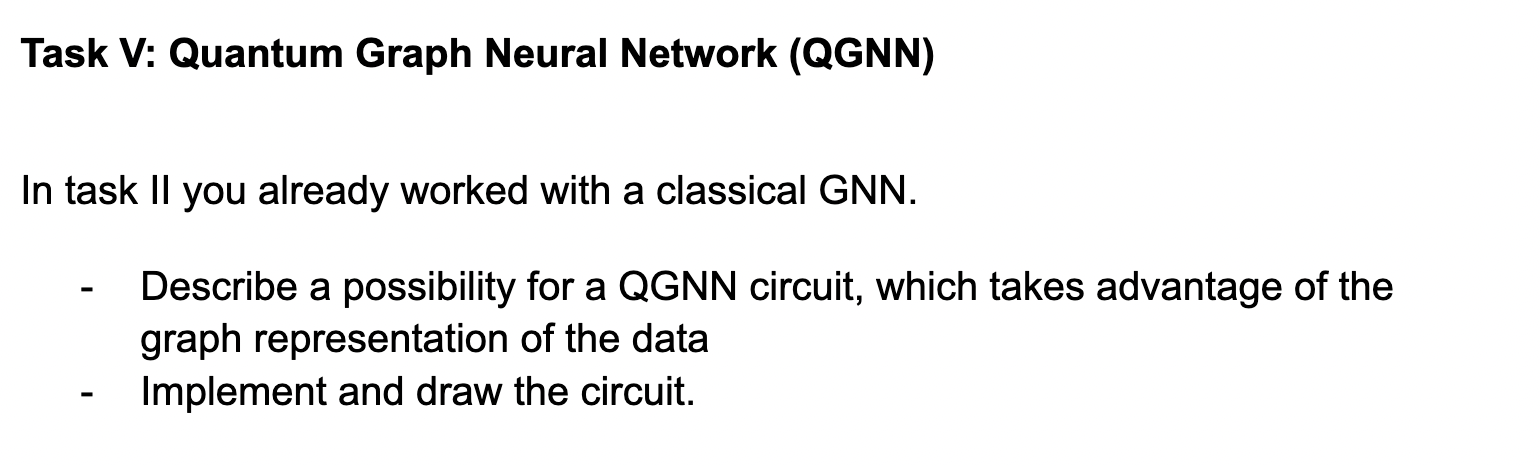

For this task, I will describe the Ego-graph based Quantum Graph Neural Network (egoQGNN) and implement it's quantum circuit

## Ego-graph based Quantum Graph Neural Network (egoQGNN)

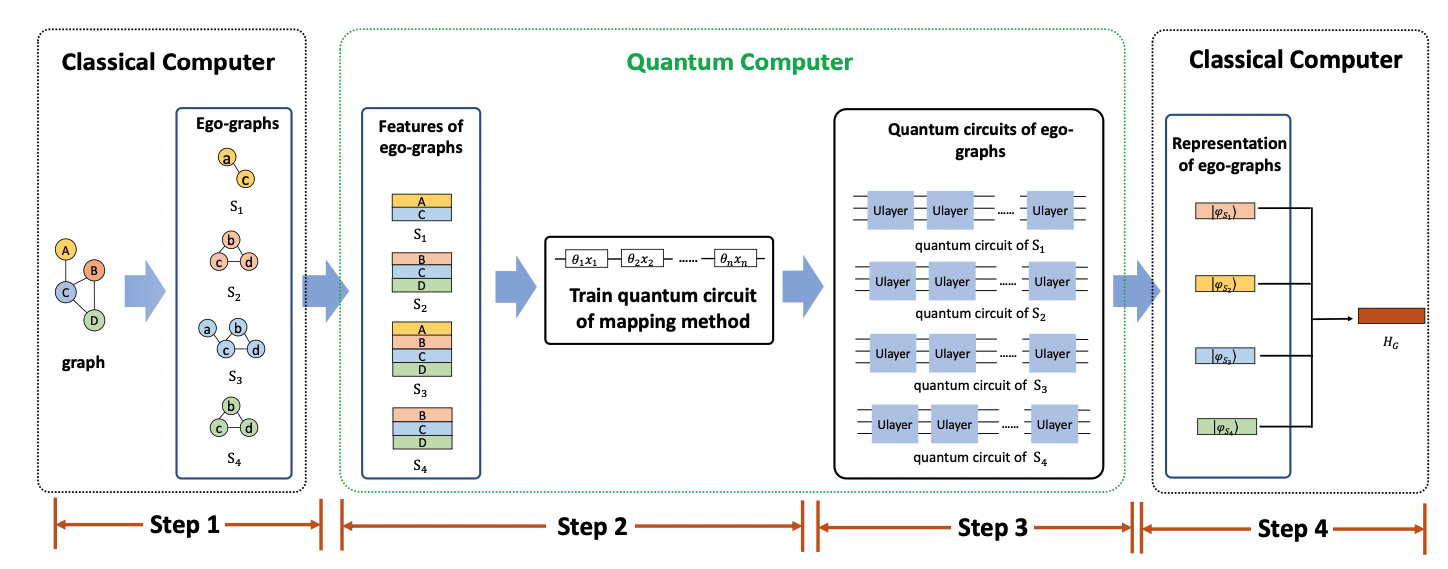

Figure: An instance of the egoQGNN

The steps of the egoQGNN is explained below-

**Step 1:** An ego-graph consists of a central node and all of its connected neighbors. In this step, a large graph is decomposed into small ego-graphs using classical computer. 

**Step 2:** In this step, a quantum circuit is trained to map classical data to quantum states using a loss function related to the distance relation between the Euclidean space and the Bloch spehere. The trained parameters are stored in classical computer and  used to encode nodes and neighbouring nodes during training of Ulayer-s.

**Step 3:** Ulayer is a hierarchical structure similar to that of the Graph Neural Network and the same structure is repeated K times. The goal of this circuit is to aggregate the neighboring quantum states (|φμ⟩) into the quantum state of the node v (|φv⟩) to update the representation of the node v. In this step, a node and it's neighboring nodes are inputed in the first Ulayer. The ouput of this layer is the tensor product of the quantum states over all the qubits. And this is inputed in the next Ulayer.

**Step 4:** a classical computer computes the entropies of the individual representations and combines them using an equation. During the training, UOBYQA. which is based on a derivative-free optimization method, is used to optimize the egoQGNN.




The advantages of this model are-
1. As small sized ego-graphs are used in this model, this model can be handeled by existing small sized quantum devices.
2. This method  utilizes the tensor prod- uct and unitary matrice representations to imple- ment the theoretical framework of the GNN which are native to quantum computers.
3. The egoQGNN achieves a similar performance but with only 1.68% of the parameters when compared with the GNN model with the least parameters, DGCNN

#### Possibility
One great possibility for egoQGNN is that it can be applied to real-world data and it is not limited by the number of available qubits. This model has been tested on Proteins dataset which has 1113 graphs. It shows that egoQGNN has great potential and more experiements should be done to test it's capabilites.



## Implementation

The quantum circuit for the egoQGNN is drawn below-

In [ ]:
! pip install -q qiskit pylatexenc

In [ ]:
from qiskit import *
from qiskit.circuit import ParameterVector

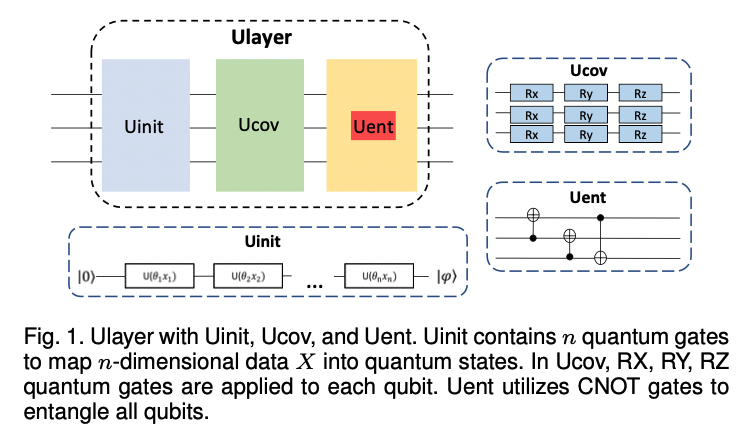

Figure: Architechture of Ulayer

In the figure above you can see the architechture of Ulayer which is the building block of the quantum circuit. The number of qubits of Ulayer depends on number of neighboring nodes. 

To implement this architechture, I will start with writing function for creating individual components. 

Ucov circuit

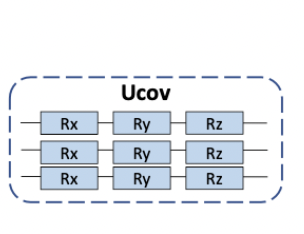

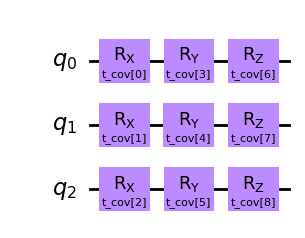

In [ ]:
def create_Ucov(neighbours=2):
  u_cov = QuantumCircuit(neighbours + 1, name="Ucov")
  thetas_Ucov = ParameterVector(f't_cov', (neighbours+1) * 3 )
  
  for i in range(neighbours+1):
    u_cov.rx(thetas_Ucov[i],i)
    u_cov.ry(thetas_Ucov[i+neighbours + 1],i)
    u_cov.rz(thetas_Ucov[i+neighbours*2+2],i)

  return u_cov

create_Ucov(2).draw('mpl')

Uent circuit

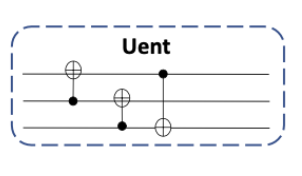

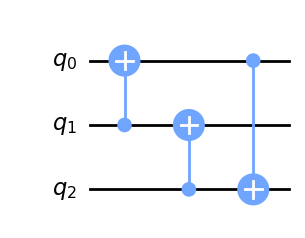

In [ ]:
def create_Uent(neighbours):
    u_ent = QuantumCircuit(neighbours+1, name="Uent")
    
    for i in range(neighbours):
      u_ent.cx(i+1,i)
    u_ent.cx(0,neighbours)

    return u_ent

create_Uent(2).draw('mpl')

Uinit Circuit

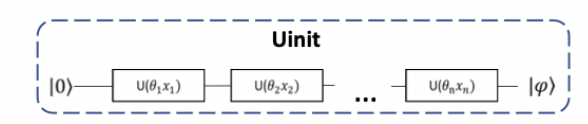

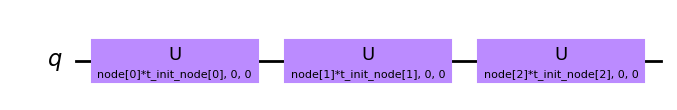

In [ ]:
def create_Uinit(dim,name):


  X = ParameterVector(f'{name}', dim)
  thetas_Uinit = ParameterVector(f't_init_{name}', dim)
  u_init = QuantumCircuit(1, name="Uinit")

  for i in range(dim):
    u_init.u(thetas_Uinit[i]*X[i], 0, 0,0)

  return u_init

create_Uinit(3,"node").draw('mpl')

ULayer

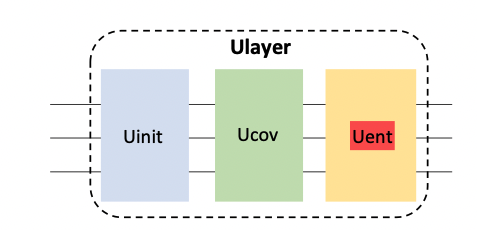

In [ ]:
def create_Ulayer(neighbours=2):
  u_layer = QuantumCircuit(neighbours + 1)
  # encode the node
  u_layer.compose(create_Uinit(dim=3, name="X"), inplace=True, wrap=True)
  # encode neighbours
  for i in range(neighbours):
    u_layer.compose(create_Uinit(dim=3,name=f"n{i+1}"),[i+1], inplace=True, wrap=True)
  # Ucov circuit
  u_layer.compose(create_Ucov(neighbours=neighbours), inplace=True, wrap=True)
  # Uent circuit
  u_layer.compose(create_Uent(neighbours), inplace=True, wrap=True)

  return u_layer

Quantum Circuit for a ego-graph with 2 neighbours and 3 reps of Ulayers


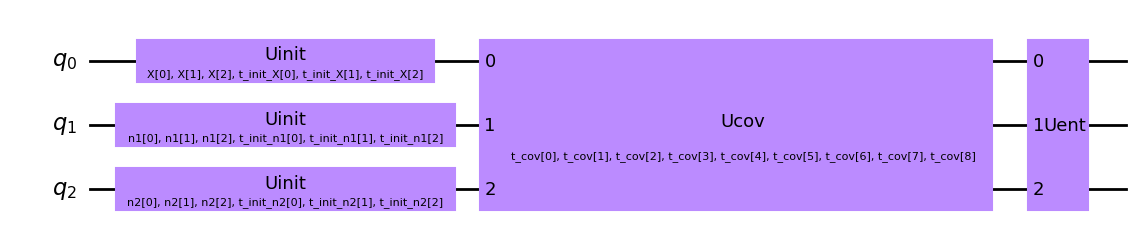

In [ ]:
print("Quantum Circuit for a ego-graph with 2 neighbours and 3 reps of Ulayers")
create_Ulayer(2).draw("mpl")

In the egoQGNN the Ulayer is repeated K times. The authors of the paper used k=3 for experiments. Considering the likely effects of noise interference on quantum devices, the three-bit error correction method can also be applied in the Ulayers.